# RIOS: RainbowRio

<a href="https://colab.research.google.com/github/idea-fasoc/OpenFASOC/blob/main/docs/source/notebooks/temp-sense-gen/temp_sense_genCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
RIOS, November 2022
SPDX-License-Identifier: Apache-2.0
```

## Team Members
|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Zhengxuan Luan|RIOS Lab, TBSI, Tsinghua University|No|No|
|Zexin Fu|RIOS Lab, TBSI, Tsinghua University|No|No|
|Peichen Guo|RIOS Lab, TBSI, Tsinghua University|No|No|
|Xinze Wang|RIOS Lab, TBSI, Tsinghua University|No|No|
|Chao Wang|RIOS Lab, TBSI, Tsinghua University|No|No|
|Mingzi Wang (Lead) <br /> Email ID: mingzi.w@rioslab.org|RIOS Lab, TBSI, Tsinghua University|No|No|
|Zhangxi Tan (Advisor)) <br /> Email ID: xtan@rioslab.org|RIOS Lab, TBSI, Tsinghua University|No|No|

Welcome!
This notebook serves as an introduction to [RainbowRio](https://github.com/zhengxuan-luan/GreenRio_uncore): an open-source processor uncore subsystem exploration and evaluation platform. This platform automates the design flow end-to-end in Python-Colab environment and supports designing completely with open-source EDA tools(OpenLane).

**_Index Terms:_** open source, coherence, system on chip, cache, electronic design automation.

## Introduction
RainbowRio is developing a full-system, full-stack SoC exploration and evaluation platform, aimed at providing an open-source SoC platform for Open Source Community members. OrangeRio platfrom includes an tiny but well-established SoC, high-performance L1 data Cache and L1 instruction Cache with supporting MMU. OrangeRio Platform can be seamlessly matched with GreenRio high-performace RISC-V processor, which gives great convenience to those who want to develop applications on RISC-V environment. This project uses only open source tool set for simulation, synthesis and backend tools. The whole flow follows the OpenLane methodology and the platform environment is compatible with efabless/carvel methodology. RainbowRio enables architects to make useful insights into how to utilize this platform to construct their own processor systems, making use of this streamlined flow to achieve rapid design iteration. 
<br/><br/>

This project includes two part: cache and SoC. **Cache........**  The SoC part consists of all eseential part to boot a Linux operating system: an Uart, a GPIO, a testio(for debug), a PLIC, a CLINT and other components(like bus interconnect and timer). What's more, in order to achievewe design one EBI(external bus interface) to act as die-to-die ACE bus signal transmmter. This interface is completely compatible with [ACE](https://developer.arm.com/documentation/ihi0022/e/ACE-Protocol-Specification) bus, providing this system with cache coherence capacity cross dies. SCU is also provided to control LLC and communicate with each levels' cache. 
 
### Hierarchy

## Specification

### SoC diagram
![SoC diagram][soc_diagram_tag]

### Bus

GreenRio uses wishbone bus as on-chip bus.
|port   | description|
| :---: | :---------:|
|cyc	| indicates that a valid bus cycle is in progress. |
|stb	| chipselect: indicates a valid data transfer cycle. |
|we	    | indicates whether the current local bus cycle is a READ or WRITE cycle.|
|ack	| indicates the termination of a normal bus cycle by slave device.|
|sel    | select which byte is effective. | 
|wdata  | the data to be written to slave machine. |
|rdata  | read data responsed by slave machine. |
|addr   | indicates the target address to be read / written. |

See more detaild introduction in [WISHBONE SoC INterconnection Architecture for Portable IP Cores](https://cdn.opencores.org/downloads/wbspec_b4.pdf).

### CLINT (Core Local Interruptor)

#### Interface

|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| output  | clint_core_tmr_irq_o | 1 | timer interrupt |
| output  | clint_core_soft_irq_o | 1 | software interrupt |
| input   | wbm_clint_cyc_i | 1 | |
| input   | wbm_clint_stb_i | 1 |  |
| input   | wbm_clint_addr_i | WB_AD_WIDTH |  |
| input   | wbm_clint_wdata_i | WB_DAT_WIDTH |  |
| input   | wbm_clint_we_i | 1 | 0:read <br> 1:write |
| input   | wbm_clint_sel_i | WB_DAT_WIDTH/8| |
| output  | clint_wbm_rdata_o | WB_DAT_WIDTH |  |
| output   | clint_wbm_ack_o | 1 |  |

#### Registers

|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| mtimecmp  | 0x0200_0000  | if mtime > mtimecmp, trigger machine timer interrupt |
| stimecmp  | 0x0200_0020  | if stime > stimecmp, trigger supervisor timer interrupt |
| mtime | 0x0200_0008 | count time (synchronous with core) |
| stime | 0x0200_0028 | count time (synchronous with core) |
| msip | 0x0200_0010 | if msip[0] is written 1, generate machine software interrupt |
| ssip | 0x0200_0030 | if ssip[0] is written 1, generate supervisor software interrupt |


### PLIC(Platform-Level Interrupt Controller)

#### Interface

|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| output  | plic_core_ext_irq_o | 1 | external interrupt for core |
| input  | gpio_plic_irq_i | 1 | GPIO's interrupt instruction |
| input   | uart_plic_irq_i | 1 |UART's interrupt instruction |
| input   | wbm_plic_cyc_i | 1 | |
| input   | wbm_plic_stb_i | 1 |  |
| input   | wbm_plic_addr_i | WB_AD_WIDTH |  |
| input   | wbm_plic_wdata_i | WB_DAT_WIDTH |  |
| input   | wbm_plic_we_i | 1 | 0:read <br> 1:write |
| input   | wbm_plic_sel_i | WB_DAT_WIDTH/8| |
| output  | plic_wbm_rdata_o | WB_DAT_WIDTH |  |
| output   | plic_wbm_ack_o | 1 |  |

#### Registers

|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| uart_priority  | 0x0200_0100 | High priority interrupt can be issued first. |
| gpio_priority  | 0x0200_0104 |  |
| uart_ip | 0x0200_0108 | After one interrupt issued， its corresponding IP register rises, until core read interrupt interrupt source identification to pull down it. |
| gpio_ip | 0x0200_010c |  |
| irq_threshold | 0x0200_0110 | if interrupt priority is higher than that value, then interrupt can be issued. |
| irq_response | 0x0200_0114 | Core generates a read request for this register to response external interrupt, value is interrupt source's ID|
| irq_complete | 0x0200_0118 | After core handle present interrupt, it will write corresponding ID to this register to release corresponding gateway. |
| uart_en | 0x0200_011c | interrupt enable |
| gpio_en | 0x0200_0120 |  |

#### Peripheral devices and ID

|    devce    |   ID   |
| :------: | :---------- | 
| uart  | 1 | 
| gpio  | 2 | 

### GPIO

#### Interface
|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| input   | wbm_gpio_cyc_i | 1 | |
| input   | wbm_gpio_stb_i | 1 |  |
| input   | wbm_gpio_addr_i | WB_AD_WIDTH |  |
| input   | wbm_gpio_wdata_i | WB_DAT_WIDTH |  |
| input   | wbm_gpio_e_i | 1 | 0:read <br> 1:write |
| input   | wbm_gpio_sel_i | WB_DAT_WIDTH/8| |
| output  | gpio_wbm_rdata_o | WB_DAT_WIDTH |  |
| output   | gpio_wbm_ack_o | 1 |  |
| output  | gpio_plic_irq_o | 1 |  |
| input   | gpio_in_i | 1 | | |
| output   | gpio_out_o | 1 | |


#### Registers
|    register    |   address   |    description         |
| :------: | :---------- | :------------------- | 
| GPIO_VALUE_ADDR  | 0x0200_0200 |  |
|  GPIO_INPUT_EN_ADDR | 0x0200_0204 | [0]: input enable (if input enable is off, GPIO is in output mode)<br> [1]: interrupt enable |
| GPIO_PORT_ADDR | 0x0200_0208 |  |

#### interrupt mechanism

If input_enable is on and an edge change is detected, triggering an interrupt.

### UART

#### interface

|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| output  | uart_tx_o | 1 |  |
| input  | uart_rx_i | 1 |  |
| input   | wbm_uart_cyc_i | 1 | |
| input   | wbm_uart_stb_i | 1 |  |
| input   | wbm_uart_addr_i | WB_AD_WIDTH |  |
| input   | wbm_uart_wdata_i | WB_DAT_WIDTH |  |
| input   | wbm_uart_we_i | 1 | 0:read <br> 1:write |
| input   | wbm_uart_sel_i | WB_DAT_WIDTH/8| |
| output  | uart_wbm_rdata_o | WB_DAT_WIDTH |  |
| output   | uart_wbm_ack_o | 1 |  |
| output  | uart_plic_irq_o | 1 |  |

#### registers

|    register    |   address   |    description         |
| :------: | :---------- | :------------------- | 
| UART_TX_DATA_ADDR  | 0x0200_0300 | [7:0] is used <br> write to this address to fill the byte to be sent by  |
|  UART_RX_DATA_ADDR | 0x0200_0304 | [7:0] is used |
| UART_TX_CTRL_ADDR | 0x0200_0308 | [2] output interrupt enable <br> [1] 1 - two bit stop; 0 - one bit stop <br> [0] output enable |
| UART_RX_CTRL_ADDR | 0x0200_030c | [31:29] control interrupt watermark <br> [28:26] elements number in read_fifo <br> [2] input interrupt enable <br> [0] input enable |

#### message structure and interrupt mechanism

![][uart_message_structure_tag]

    baud rate is 115200
    Parity code is even parity check. For example: tx_data = 8'b11110000, parity_code = 1'b0
    The send buffer's depth and receive buffer's depth are both 8. 
    If the send buffer is full and still write to UART_TX_DATA_ADDR, the data in front slot will be discard.
    If the receive buffer is full and the position machine still sends message to UART, the data can't be received.
    If the elem number in output_fifo is less than tx_ctrl[18:16], trigger an interrupt. 
    If the elem number in input_fifo is less than rx_ctrl[18:16], trigger an interrupt.

### CRG

#### interface
|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| input  |  async_reset_i  |  1  |   | 
| input  |  external_clk_i  |  1  |   |
| output |  global_clk_o    |   1  |   |
| output |  ebi_clk_o    |   1  |   |
| output |  core_reset_o  |   1  |   |
| output  |  perips_reset_o  |  1  |   | 
| input   | wbm_crg_cyc_i | 1 | |
| input   | wbm_crg_stb_i | 1 |  |
| input   | wbm_crg_addr_i | WB_AD_WIDTH |  |
| input   | wbm_crg_wdata_i | WB_DAT_WIDTH |  |
| input   | wbm_crg_we_i | 1 | 0:read <br> 1:write |
| input   | wbm_crg_sel_i | WB_DAT_WIDTH/8| |
| output  | crg_wbm_rdata_o | WB_DAT_WIDTH |  |

#### registers
|    register    |   address   |    description         |
| :------: | :---------- | :------------------- | 
| CRG_CTRL_ADDR  | 0x0200_0400 | [3:0] domain1\~4 clock enable <br> [7:4] domain1\~4 reset signal |
    Domain1: hehe, cache, clint, plic
    Domain2: uart
    Domain3: gpio
    Domain4: ebi
    Global config: testio, wb_interconnect, crg

### EBI

EBI is used for forwarding ACE bus transactions to off-chip part(SCU, L2 Cache etc).
#### diagram
![][ebi_diagram_tag]
#### Message structure
![][ebi_message_tag]
#### interface
|    IO    |       name         |     width      |             description                |
| :------: | :----------------- | :------------- | :------------------------------------- |
| ...  | l2_req_if_arready_o, <br>l2_req_if_arvalid_i <br> ...  |    | Port connected with Cache is same as SCU's | 
| input  |  ebi_i  |  16  |  accept the message from external ebi |
| output |  ebi_o    |   16  |  send messages to external ebi |
| output |  ebi_oen    |   16  | control the I/O mode of connected GPIO port  |
| input |  bus_switch_i  |   1  | When internal ebi accquire the ebi_bus, and external ebi needs to raise a request. External ebi needs to send a request through this channel to get the control of ebi_bus.  |
| output  |  bus_siwtch_o  |  1  | When internal ebi release the ebi_bus, and needs to raise a request(read or write). It needs to send a request through this channel to get the control of ebi_bus.  | 
|output | bus_switch_oen | 1 | control the I/O mode of bus_switch channel's connected GPIO port |


#### state transition

##### read process
`IDLE` -> `SEND_AR` -> `WAIT_R` -> `RECV_R` -> `RESP_R` -> `IDLE`

| original state | new state | transiting condition|
| :----: | :-------: | :-------: |
|IDLE | SEND_AR | Ebi is in idle, ready is high. Change state when the r_buffer has accepted the latest AR message. |
| SEND_AR | WAIT_R|  Use counter to tell the data to be sent cycle by cycle according to the protocol, and then enter WAIT_R (no bus control is released at this time) |
| WAIT_R | RECV_R | Start to read message from external ebi in cycle by cycle |
| RECV_R | RESP_R | Raise read channel's valid and wait cache to read data outside. |
| RESP_R | IDLE | When cache completes the reading process, state return IDLE. |

##### write process
`IDLE` -> `SEND_W` -> `WAIT_WACK` -> `CHECK_WACK` ->`IDLE`

| original state | new state | transiting condition|
| :----: | :-------: | :-------: |
|IDLE | SEND_W | Ebi is in idle, ready is high. Change state when the w_buffer has accepted the latest AW message. w_buffer has its own fsm, which controls its filling process. AW channel and W channel's message are both stored in w_buffer.  |
| SEND_W | WAIT_WACK|  Use counter to tell the data to be sent cycle by cycle according to the protocol, and then enter WAIT_WACK (no bus control is released at this time) |
| WAIT_WACK | CHECK_WACK | Start to read ack message. |
| CHECK_WACK | IDLE | Check whether writing has been handled successfully. If the data has been written to target address, return IDLE. |


##### snoop process
`IDLE` -> `RECV_SNP` -> `WAIT_SNP_REQ_READ` -> `WAIT_SNP_RESP` -> `SEND_SNP_RESP` ->`IDLE`

| original state | new state | transiting condition|
| :----: | :-------: | :-------: |
|IDLE | RECV_SNP |When the external ebi wants to raise a snoop request, it first has to accquire the bus control. Inner ebi changes state when the trx receive a start signal. The receive buffer starts to receive snoop request message |
| RECV_SNP | WAIT_SNP_REQ_READ | Output ports connected with cache snoop_request_ports abstract signal from receive buffer, valid signal rises, waiting cache to accept request. |
| WAIT_SNP_REQ_READ | WAIT_SNP_RESP | Snoop request is accepted by cache, waiting cache snoop response. |
| WAIT_SNP_RESP | SEND_SNP_RESP | The snoop_buffer has stored the response message from cache. Ebi starts to send this messages. |
| SEND_SNP_RESP | IDLE | After completing the sending process, ebi returns idle. (Because ebi acts as a slave in this process, it doesn't need to check ack) |

### TESTIO
#### interface 

| Signal Name | Width | IO     | Description                                             |
| ----------- | ----- | ------ | ------------------------------------------------------- |
| mem_if_req_valid    | 1     | input  | request valid signal |
| mem_if_req_ready    | 1     | output | request ready signal |
| mem_if_req_type     | 3     | input  | request type<br />'h0 : read <br />'h1 : write request |
| mem_if_req_tid      | 8     | input  | request id      |
| mem_if_req_paddr    | 32    | input  | request address |
| mem_if_req_data     | 32    | input  | request data, for write |
| mem_if_req_mask     | 4     | input  | request byte mask,for write |
| mem_if_resp_valid   | 1     | output | response valid  |
| mem_if_resp_ready   | 1     | input  | response ready  |
| mem_if_resp_type    | 3     | output | response type, same with request type |
| mem_if_resp_data    | 32    | output | response data  |
| mem_if_resp_tid     | 8     | output | response id    |
| ti_mod_i    | 2     | input  | testio tansport mode parameter,<br />[1:0] configure bit width:<br />00->1bit/single line,<br />01->8bits/8lines,<br />10->16bits/16lines,<br />11->32bits/32lines                         |
| ti_rstn_i   | 1     | input | rstn in|
| ti_int_i    | 1     | input  | testio interrupt from pad                               |
| ti_int_o    | 1     | output | testio interrupt to core                                       |
| ti_clk_i    | 1     | input | testio clk input signal from clk source, ti_clk_i == mem_if_clk |
| ti_clk_o    | 1     | output | testio clk output signal to pinmux/pad                  |
| ti_clk_oen  | 1     | output | testio clk output enable                                |
| ti_dat_o    | 32    | output | supply transport mode:<br />1bit, 8bit, 16bit and 32bit with ticsr register, to pinmux/pad                            |
| ti_dat_oen  | 32    | output | data output enable                                      |
| ti_dat_i    | 32    | input  | supply transport mode:<br />1bit, 8bit, 16bit and 32bit with ticsr register,from pinmux/pad                            |
#### TESTIO Protocol Example 
**TESTIO 1bit transport mode**  
![][testio_1bit_tag]

#### state machine description
State Description
1. TI_IDLE<br/>
Idle state, no transceiver, data bus is high, mem_if_valid and mem_if_type trigger state change.<br/>
2. TI_WR_SEND<br/>
Write mode send state, this mode sets the testio bus to output, and enters TI_WR_RCV_IDLE state after sending;<br/>
3. TI_WR_RCV_IDLE<br/>
The write mode waits for the START signal from the slave, the data bus is high, and after the slave Start signal is detected, it enters the TI_WR_RCV_ACK state;<br/>
4. TI_WR_RCV_ACK<br/>
Write mode detects ACK state, detects whether the slave responds to ACK signal correctly;<br/>
5. TI_WR_RCV_PARITY<br/>
Write mode detects the PARITY status of the ACK, and detects whether the slave is responding to the ACK signal correctly;<br/>
6. TI_WR_RCV<br/>
Write mode detects the STOP signal of the ACK, and detects whether the slave is finished responding to the ACK signal;<br/>
7. TI_RD_SEND<br/>
Read mode send state, this mode set testio bus as output, after sending into TI_RD_RCV_IDLE;<br/>
8. TI_RD_RCV_IDLE<br/>
Read mode wait for the slave to respond to START, the data bus is high, after detecting the slave Start signal, enter the TI_RD_RCV_ACK state;<br/>
9. TI_RD_RCV_ACK<br/>
Read mode detects ACK state, detects whether the slave response ACK signal is correct, if it is correct, it enters TI_RD_RCV state;<br/>
10. TI_RD_RCV<br/>
Read mode reads data status, this mode reads data, parity, and enters TI_RD_RESP after reading;<br/>
11. TI_RD_RESP<br/>
Read mode response to mem_if_resp state, this state will read the data to the mem_if_resp bus, and then enter TI_IDLE state after the transfer;<br/>
12. TI_ACK_ERR<br/>
The read/write mode enters this error mode when it encounters a data error, and enters the TI_IDLE state after the error mode sends an error signal;<br/>
#### TX and RX
![][txandrx_tag]

[txandrx_tag]: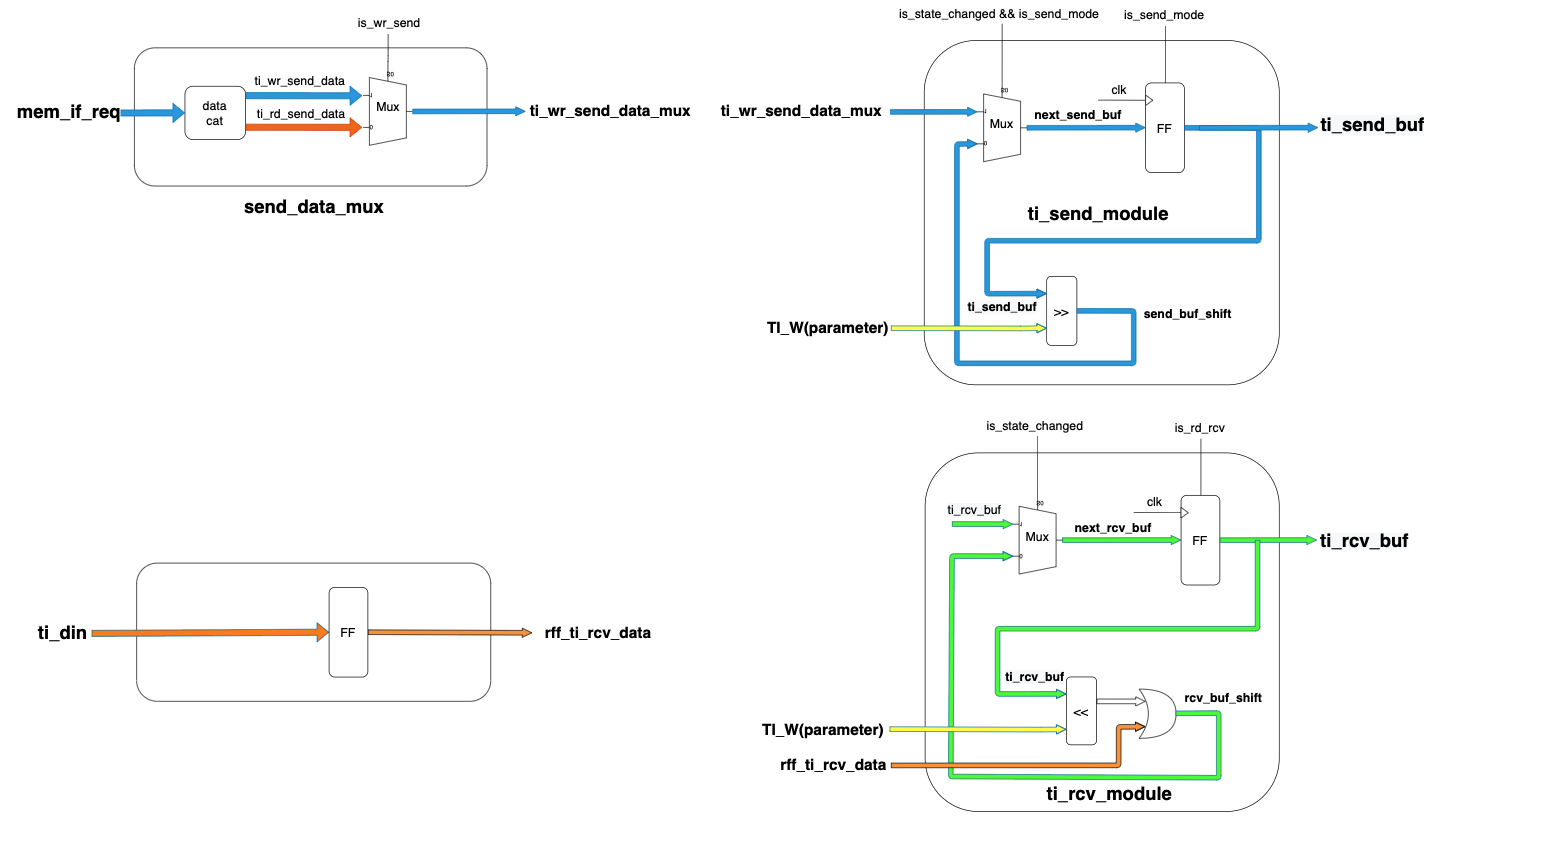

[testio_1bit_tag]: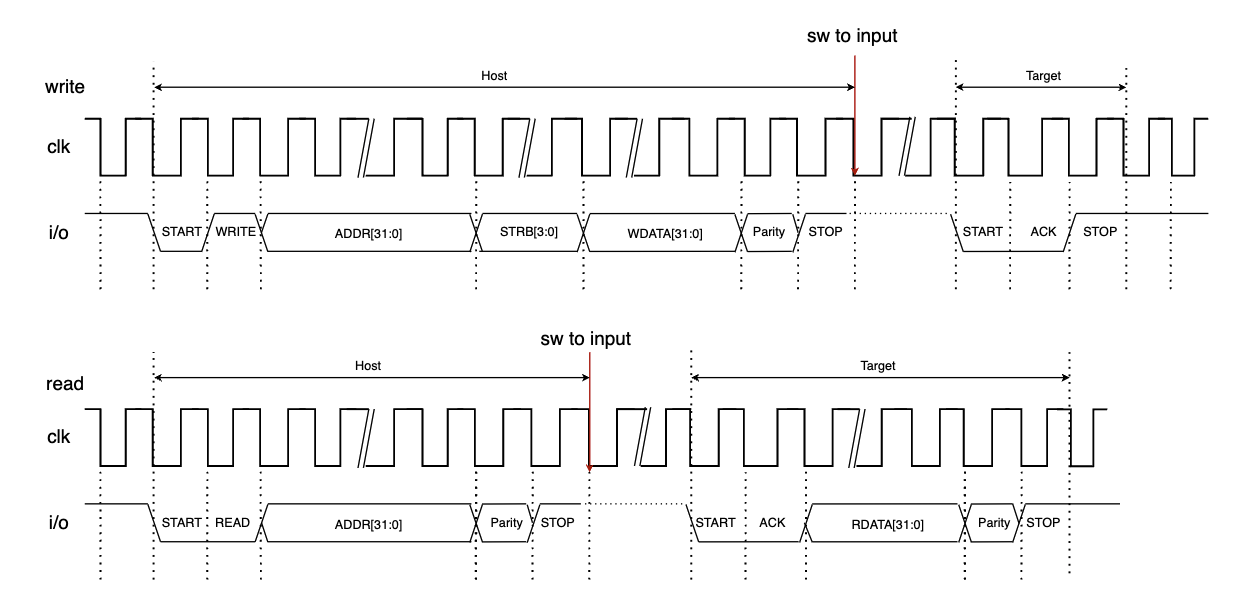
[soc_diagram_tag]: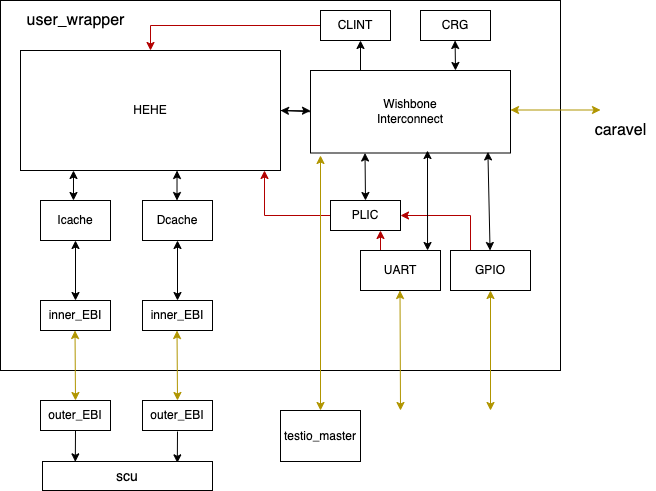

[uart_message_structure_tag]: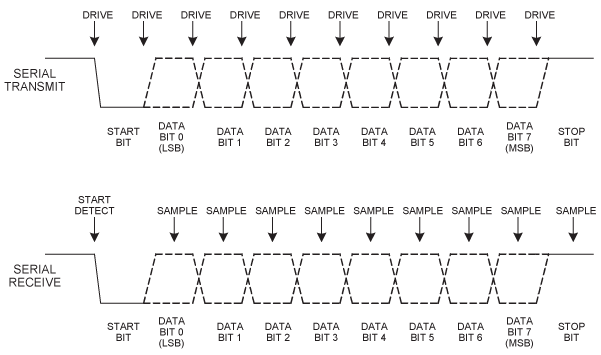

[ebi_diagram_tag]: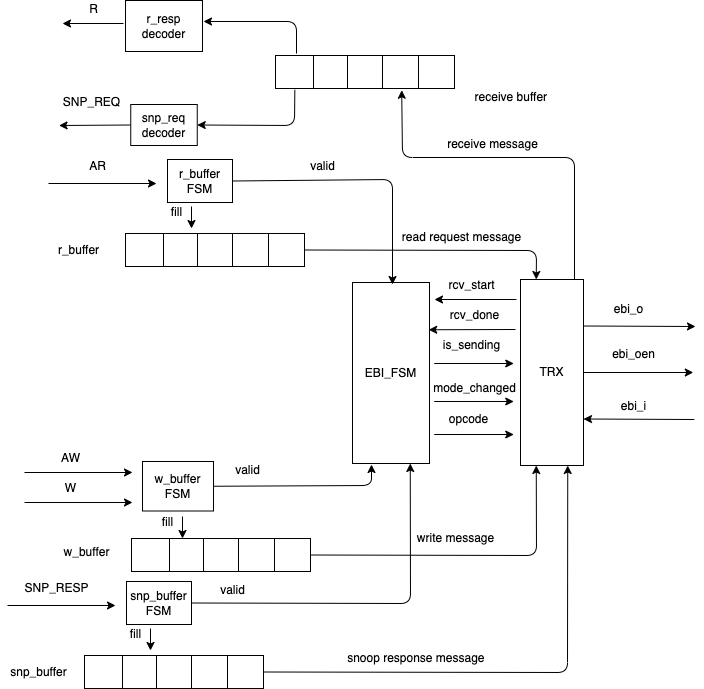

[ebi_message_tag]: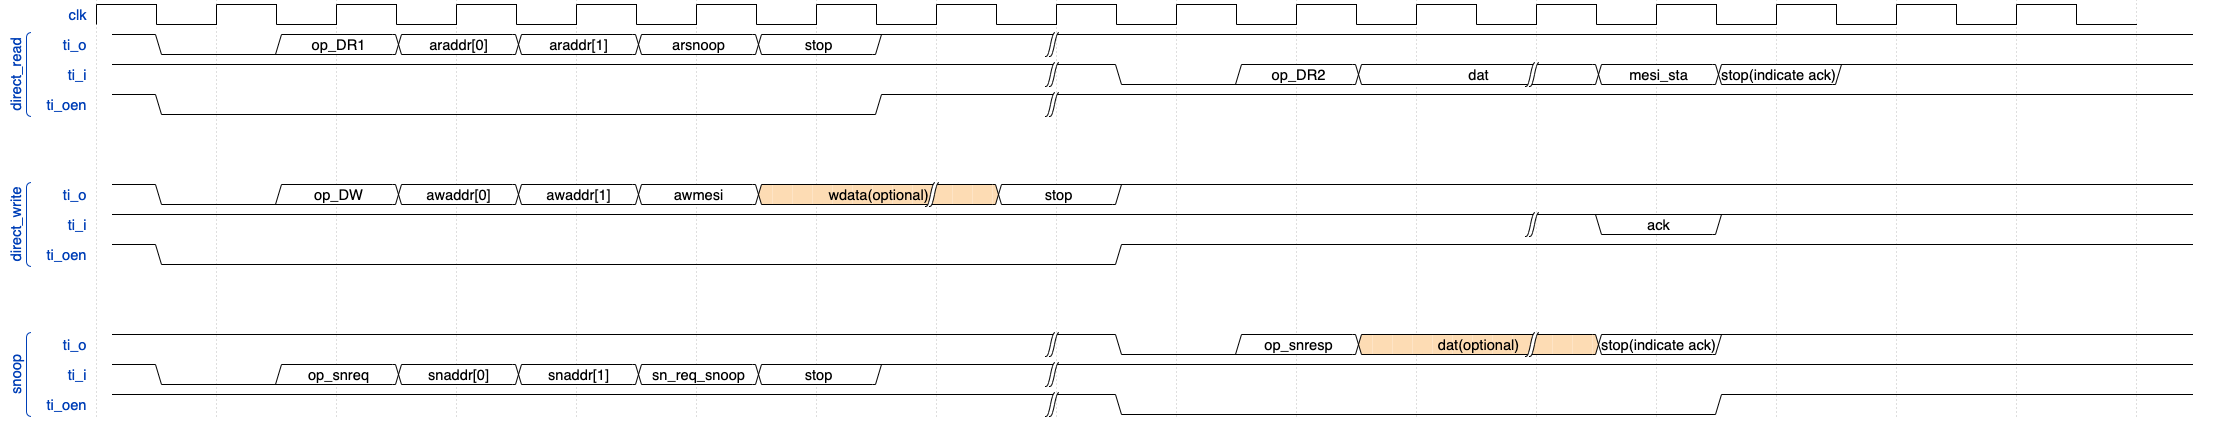


## RTL to GDSII Flow

### Install dependencies

In [1]:
import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        openroad \
                        netgen \
                        yosys 
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click

bin/micromamba
env: CONDA_PREFIX=/content/conda-env
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: LD_LIBRARY_PATH=/content/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

[+] 0.0s
[+] 0.1s
litex-hub/linux-64  ⣾  
litex-hub/noarch    ⣾

### Import Source Code

In [2]:
!rm -rf GreenRio_uncore
!git clone https://github.com/zhengxuan-luan/GreenRio_uncore.git

Cloning into 'GreenRio_uncore'...
remote: Enumerating objects: 505, done.
remote: Counting objects: 100% (505/505), done.
remote: Compressing objects: 100% (349/349), done.
remote: Total 505 (delta 162), reused 474 (delta 136), pack-reused 0
Receiving objects: 100% (505/505), 3.49 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (162/162), done.


### SoC

#### Write configuration

In [3]:
%%writefile clock.sdc
create_clock -name perips_clk -period 20.000 [get_ports {clk}] 
set_propagated_clock [get_clocks {clk}] 
create_clock -name testio_clk -period 20.000 [get_ports {testio_clk}] 
set_propagated_clock [get_clocks {testio_clk}] 


Writing clock.sdc


In [14]:
%%writefile config.tcl
set ::env(DESIGN_NAME) soc_top

set ::env(VERILOG_FILES) "\ 
GreenRio_uncore/rtl/perips/on_chip/*.v \
GreenRio_uncore/rtl/perips/on_chip/perips_cfg.vh"

set ::env(CLOCK_PORT) "clk testio_clk"

set ::env(PL_RANDOM_GLB_PLACEMENT) 0
set ::env(CLOCK_PERIOD) {20.0}
set ::env(RT_MAX_LAYER) {met4} 
set ::env(RUN_FILL_INSERTION) 1 
set ::env(RUN_TAP_DECAP_INSERTION) 1 
set ::env(QUIT_ON_LVS_ERROR) "0" 
set ::env(QUIT_ON_MAGIC_DRC) "0" 
set ::env(QUIT_ON_NEGATIVE_WNS) "0" 
set ::env(QUIT_ON_SLEW_VIOLATIONS) "0" 
set ::env(QUIT_ON_TIMING_VIOLATIONS) "0" 
set ::env(SYNTH_MAX_FANOUT) 20 
set ::env(RUN_CVC) 0 
set ::env(GRT_MAX_DIODE_INS_ITERS) 5 

set ::env(SDC_FILE) "./clock.sdc" 
set ::env(BASE_SDC_FILE) "./clock.sdc" 

# set ::env(FP_SIZING) absolute
# set ::env(DIE_AREA) "0 0 850 850"
set ::env(FP_CORE_UTIL) 23
set ::env(PL_TARGET_DENSITY) 0.25
set ::env(SYNTH_STRATEGY) "AREA 3"
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

# set ::env(DIODE_INSERTION_STRATEGY) 4

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

set ::env(PL_RESIZER_TIMING_OPTIMIZATIONS) 1
# set ::env(PL_RESIZER_HOLD_SLACK_MARGIN) 0
# set ::env(PL_RESIZER_SETUP_SLACK_MARGIN) 0
set ::env(GLB_RESIZER_TIMING_OPTIMIZATIONS) 1

# set ::env(SYNTH_READ_BLACKBOX_LIB) 1
# set ::env(VERILOG_FILES_BLACKBOX) "\
#     GreenRio_uncore/rtl/perips/on_chip/sky130_fd_sc_hd.v \
# 	"
# set ::env(EXTRA_LEFS) "GreenRio_uncore/rtl/macros/lef/sky130_fd_sc_hd.lef"
# set ::env(EXTRA_GDS_FILES) "GreenRio_uncore/rtl/macros/gds/sky130_fd_sc_hd.gds"

Overwriting config.tcl


### Run OpenLane Flow

In [15]:
# !rm -rf OpenLane                        
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane
import os
import pathlib
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design . -ignore_mismatches

fatal: destination path 'OpenLane' already exists and is not an empty directory.
env: PDK_ROOT=/content/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/content/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
OpenLane cb59d1f84deb5cedbb5b0a3e3f3b4129a967c988
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, versi

### Display layout

In [ ]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('picorv32a.svg')
IPython.display.SVG('picorv32a.svg')

### Dump flow report

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

### Cache

## Design Verification

In [16]:
!sudo apt-get install git perl python3 make autoconf g++ flex bison ccache
!sudo apt-get install libgoogle-perftools-dev numactl perl-doc
!sudo apt-get install libfl2  # Ubuntu only (ignore if gives error)
!sudo apt-get install libfl-dev  # Ubuntu only (ignore if gives error)
!sudo apt-get install zlibc zlib1g zlib1g-dev  # Ubuntu only (ignore if gives error)
!git clone https://github.com/verilator/verilator   # Only first time

# Every time you need to build:
%cd verilator
!git pull         # Make sure git repository is up-to-date
!git checkout v4.224 

!autoconf         # Create ./configure script
!./configure      # Configure and create Makefile
!make -j `nproc`
!sudo make install
verilator_bin_path = pathlib.Path('bin')
VERILATOR_PATH = str(verilator_bin_path.resolve())
%env PATH={VERILATOR_PATH}:{PATH}
%cd ../GreenRio_uncore
!pwd
%env SRC_ROOT = rtl
%env DV_ROOT = dv
!make verify_soc
%cd ..

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
git is already the newest version (1:2.17.1-1ubuntu0.13).
perl is already the newest version (5.26.1-6ubuntu0.6).
perl set to manually installed.
python3 is already the newest version (3.6.7-1~18.04).
python3 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  automake autotools-dev libbison-dev libfl-dev libfl2 libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext bison-doc distcc
  flex-doc m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev bison ccache flex libbison-dev libfl

## Future Work

Due to the limit of OpenMPW's IO pad, we only add several essential device to this SoC (most IO ports are allocated to EBI). Besides, we have to admit that the speed of EBI becomes a critical part to block the speed of whole system when the system is running in multi-core environment. To support richer peripheral device subsystems, we are commiting to develop advanced die-to-die interconnect interface, whose aim is to use fewer IO ports reaching higher data transmmiting speed. Next generation RainbowRio is expected to open Serdes and ddr/PCIE-compatible interface IP to community to further increase the speed. In Rainbow's blueprint, we also consider to develop chiplet ecosystem, which allows us to package multiple RainbowRio die into one chip to reduce cost and improve performance. 